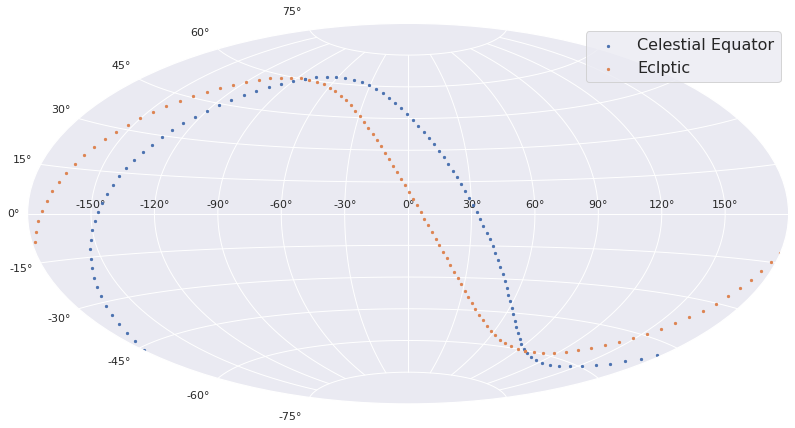

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from astropy.table import Table, vstack
from astropy.io import fits
from astropy.wcs import WCS
import aplpy
from matplotlib.colors import LogNorm
from astropy.visualization.wcsaxes.frame import EllipticalFrame
from matplotlib import patheffects
import matplotlib as mpl

from astropy.coordinates import SkyCoord
from astropy import units as u

ra_all = np.linspace(-180, 180, 100)
dec_0 = np.zeros(100)

# Transform equatorial coordinates to galactic
eq = SkyCoord(ra_all, dec_0, unit=u.deg)
gal = eq.galactic
l_plot, b_plot = gal.l.wrap_at('180d').radian, gal.b.radian


lon = np.linspace(0, 360, 100)
lat = np.zeros(100)

# Transform ecliptic coordinates to galactic
ecl = SkyCoord(lon, lat, unit=u.deg, frame='barycentricmeanecliptic')
ecl_gal = ecl.transform_to('galactic')
l_ecl_gal, b_ecl_gal = ecl_gal.l.wrap_at('180d').radian, ecl_gal.b.radian


plt.figure(figsize=(14,7))
plt.subplot(111, projection='aitoff')

plt.scatter(l_plot, b_plot, s=5, label='Celestial Equator')
plt.scatter(l_ecl_gal, b_ecl_gal, s=5, label='Eclptic')


plt.grid(True)
plt.legend(fontsize=16)

plt.show()

# With my data (Flag = 0)

In [75]:
table = Table.read("../3filter_flat0/Halpha-DR3_errorFlag0_merge.ecsv", format="ascii.ecsv")

In [76]:
hdu = fits.open('../Halpha_map.fits')
wcs = WCS(hdu[0].header)
wcs

the PROJPn keyword is deprecated, use PVi_ma. [astropy.wcs.wcs]
the PROJPn keyword is deprecated, use PVi_ma. [astropy.wcs.wcs]


WCS Keywords

Number of WCS axes: 2
CTYPE : 'GLON-CAR'  'GLAT-CAR'  
CRVAL : 0.0  0.0  
CRPIX : 4320.5  2160.5  
CD1_1 CD1_2  : -0.0416666666667  0.0  
CD2_1 CD2_2  : 0.0  0.0416666666667  
NAXIS : 8640  4320

In [77]:
ra = table["RA"]
dec = table["DEC"]

In [78]:
# Transform equatorial coordinates to galactic
eq = SkyCoord(ra, dec, unit=u.deg)
gal = eq.galactic
l_plot, b_plot = gal.l.wrap_at('180d').radian, gal.b.radian

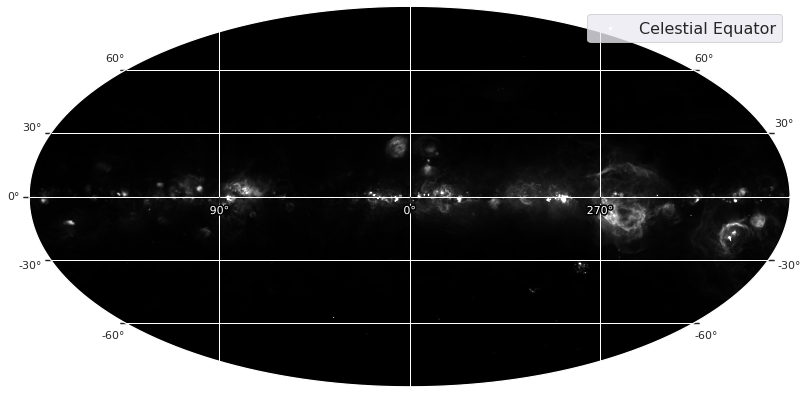

In [103]:
#f = plt.figure(figsize=(18,9))
plt.figure(figsize=(14,7))
ax = plt.subplot(projection=wcs, frame_class=EllipticalFrame)
#plt.subplot(111, projection='aitoff')
#ax1 = aplpy.FITSFigure(hdu, figure=f, subplot=(1, 1, 1))#, north=True)
#ax.scatter(l_plot, b_plot, s=5, zorder = 2., label='Celestial Equator')
#plt.imshow(hdu[0].data, origin='lower', cmap='cividis', aspect='equal', norm=LogNorm())
path_effects=[patheffects.withStroke(linewidth=3, foreground='black')]
ax.coords.grid(color='white')
ax.coords['glon'].set_ticklabel(color='white', path_effects=path_effects)
ax.scatter(l_plot, b_plot, s=5, color = "white", label='Celestial Equator')
im = ax.imshow(hdu[0].data, vmin=0., vmax=300., origin='lower', cmap='gray')

# Clip the image to the frame
im.set_clip_path(ax.coords.frame.patch)
plt.grid(True)
plt.legend(fontsize=16)

plt.show()

the PROJPn keyword is deprecated, use PVi_ma. [astropy.wcs.wcs]
the PROJPn keyword is deprecated, use PVi_ma. [astropy.wcs.wcs]


INFO: Auto-setting vmin to -1.465e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.639e+02 [aplpy.core]


<Figure size 432x288 with 0 Axes>

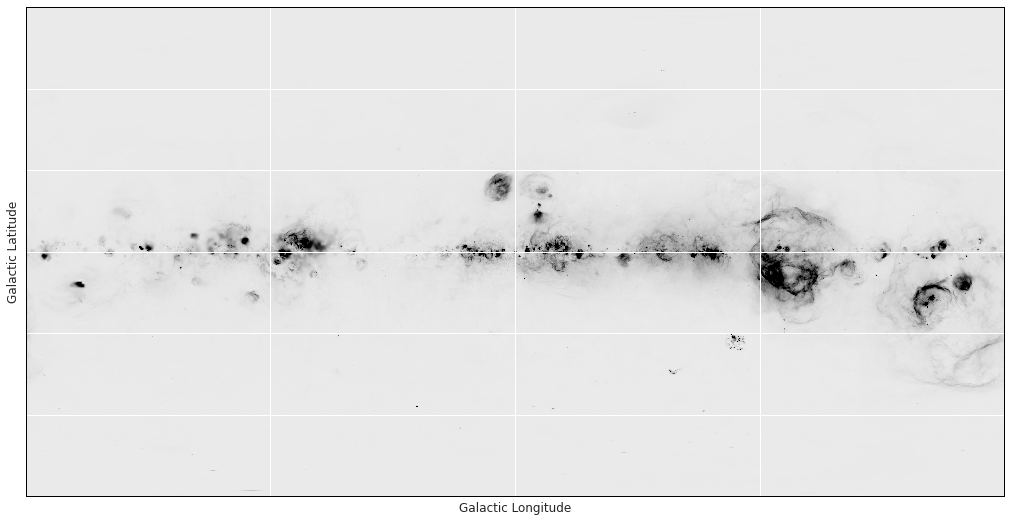

In [119]:
#plt.figure()
#plt.imshow(hdu[0].data, cmap='gray', norm=LogNorm())
#plt.imshow(hdu[0].data, cmap='gray')
#plt.colorbar()
plt.clf()
f = plt.figure(figsize=(18,9))
#plt.subplot(111, projection='aitoff')
#ax = plt.subplot(projection=wcs, frame_class=EllipticalFrame)
ax1 = aplpy.FITSFigure(hdu, figure=f, projection='aitoff', subplot=(1, 1, 1))#, north=True)
#plt.scatter(l_plot, b_plot, s=15, color="r", label='Celestial Equator')      
#ax1.recenter(ra0, dec0, 4*R0/cmd_args.zoom)
ax1.show_grayscale(invert=True) #, vmin=vmin, vmax=vmax)

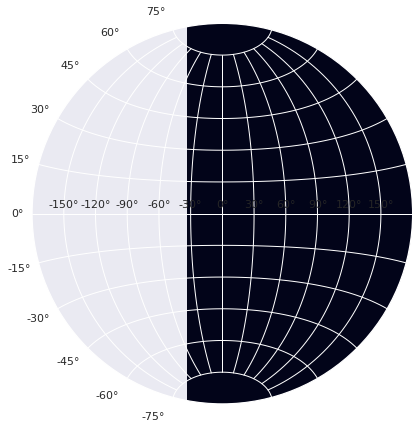

In [129]:
fig = plt.figure(figsize=(14,7))
a = fig.add_subplot(1,1,1, projection="aitoff")
a.imshow(hdu[0].data)
plt.show()

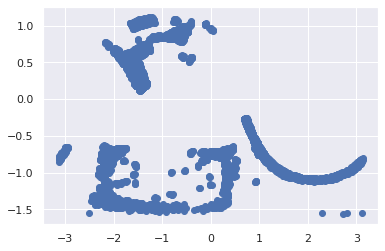

In [6]:
plt.plot(l_plot, b_plot, "o", label='Celestial Equator')

Text(0, 0.5, 'Galactic Latitude')

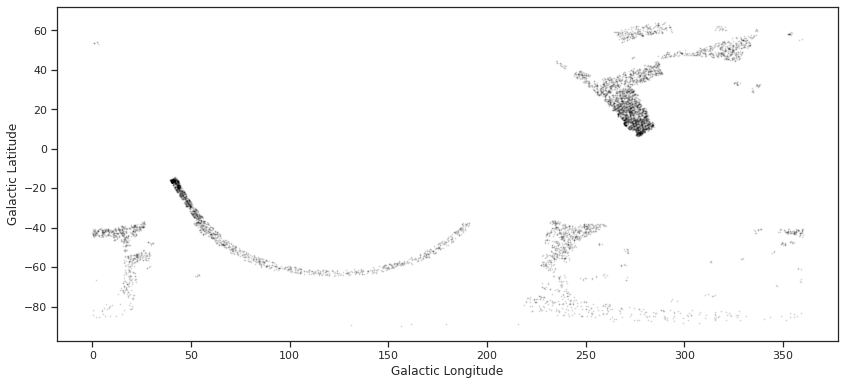

In [7]:
color_palette = sns.color_palette('Paired', 55)
sns.set_style("ticks", {"xtick.major.size": 180, "ytick.major.size": 180})

fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(1,1,1, aspect='equal')
ax.scatter(gal.l.degree, gal.b.degree , s=1, color='black', alpha=0.1)
    #ax.set_xlim(360., 0.)
    #ax.set_ylim(-90., 90.)
ax.set_xlabel("Galactic Longitude")
ax.set_ylabel("Galactic Latitude")

In [8]:
l_rad = gal.l.radian
l_rad[l_rad > np.pi] -= 2. * np.pi
b_rad = gal.b.radian


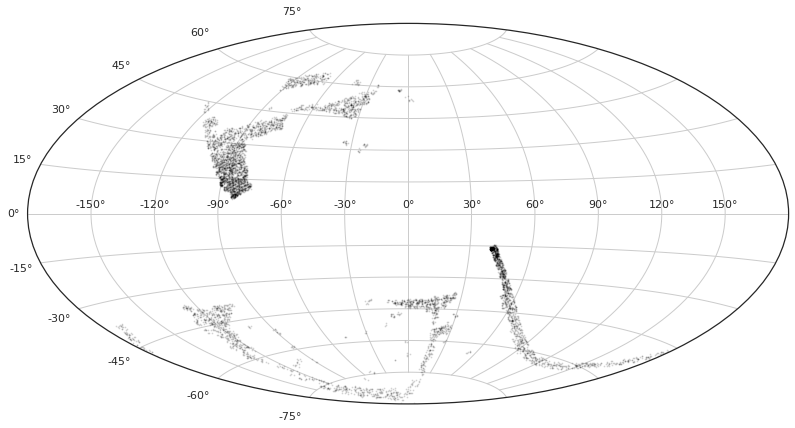

In [9]:
color_palette = sns.color_palette('Paired', 55)
with sns.axes_style("ticks"):
    fig = plt.figure(figsize=(14,7))
    ax = fig.add_subplot(1,1,1, projection='aitoff')
    ax.scatter(l_rad, b_rad, s=1, color='black', alpha=0.1)
    ax.grid()

# Other tecniques